<a href="https://colab.research.google.com/github/hastikacheddy/Identifying_Fraudulent_Transactions_using_AI/blob/main/Real_dataset_of_Identifying_Fraudulent_Transactions_using_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Identifying Fraudulent Transactions using AI

## Problem Statement:
Credit card companies are turning to Hadoop and machine learning techniques to cope with the increasing rate of transaction data. Fraudulent credit card transactions are a major challenge for financial service providers due to the difficulty in detecting them. Machine learning techniques can effectively identify fraudulent transactions based on factors such as customer behavior, expenditures, and patterns of previous scams.

The objective of this project is to leverage machine learning models for the detection of fraudulent transactions.

## Table of Contents
1. [Importing dependencies](#p1)
2. [Exploratory data analysis](#p2)
3. [Splitting the data into train & test data](#p3)
4. [Model Building](#p4)
   * [Perform cross validation with RepeatedKFold](#p4-1)
   * [Perform cross validation with StratifiedKFold](#p4-2)
   * [RandomOverSampler with StratifiedKFold Cross Validation](#p4-3)
   * [Oversampling with SMOTE Oversampling](#p4-4)
5. [Hyperparameter Tuning](#p5)
6. [Conclusion](#p6)

## <a name="p1">Importing Dependencies</a>

In [ ]:
import numpy as np
import pandas as pd
import time
import datetime as dt

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from scipy import stats
from scipy.stats import norm, skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

import sklearn
from sklearn import metrics
from sklearn.metrics import (
    roc_curve, auc, roc_auc_score, classification_report, confusion_matrix,
    average_precision_score, precision_recall_curve
)
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import (
    train_test_split, StratifiedKFold, GridSearchCV, RandomizedSearchCV,
)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier, RandomForestClassifier
)
import xgboost as xgb
from xgboost import XGBClassifier, plot_importance

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")


## <a name="p2">Exploratory data analysis and Data preprocessesing</a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
print("Google Drive mounted successfully")

Mounted at /content/gdrive
Google Drive mounted successfully


In [ ]:

# Loading the data
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/creditcard.csv')

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
#check for null
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
# Checking the shape
df.shape

(284807, 31)

In [ ]:
# Checking the datatypes and null/non-null distribution
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
# Checking distribution of numerical values in the dataset
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
# Checking the class distribution of the target variable
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

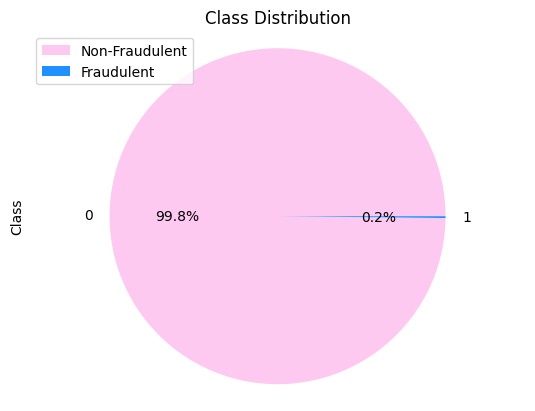

Number of Non-Fraudulent Transactions: 284315
Number of Fraudulent Transactions: 492


In [ ]:
class_distribution = df['Class'].value_counts(normalize=True) * 100
colors = ['#FEC9F1', '#1E90FF']

class_distribution.plot.pie(colors=colors, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Class Distribution')
plt.legend(['Non-Fraudulent', 'Fraudulent'])
plt.show()

# Count the number of records for each class
class_counts = df['Class'].value_counts()

# Print the number of records for each class
print("Number of Non-Fraudulent Transactions:", class_counts[0])
print("Number of Fraudulent Transactions:", class_counts[1])


In [ ]:
# Checking the correlation
corr = df.corr()
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


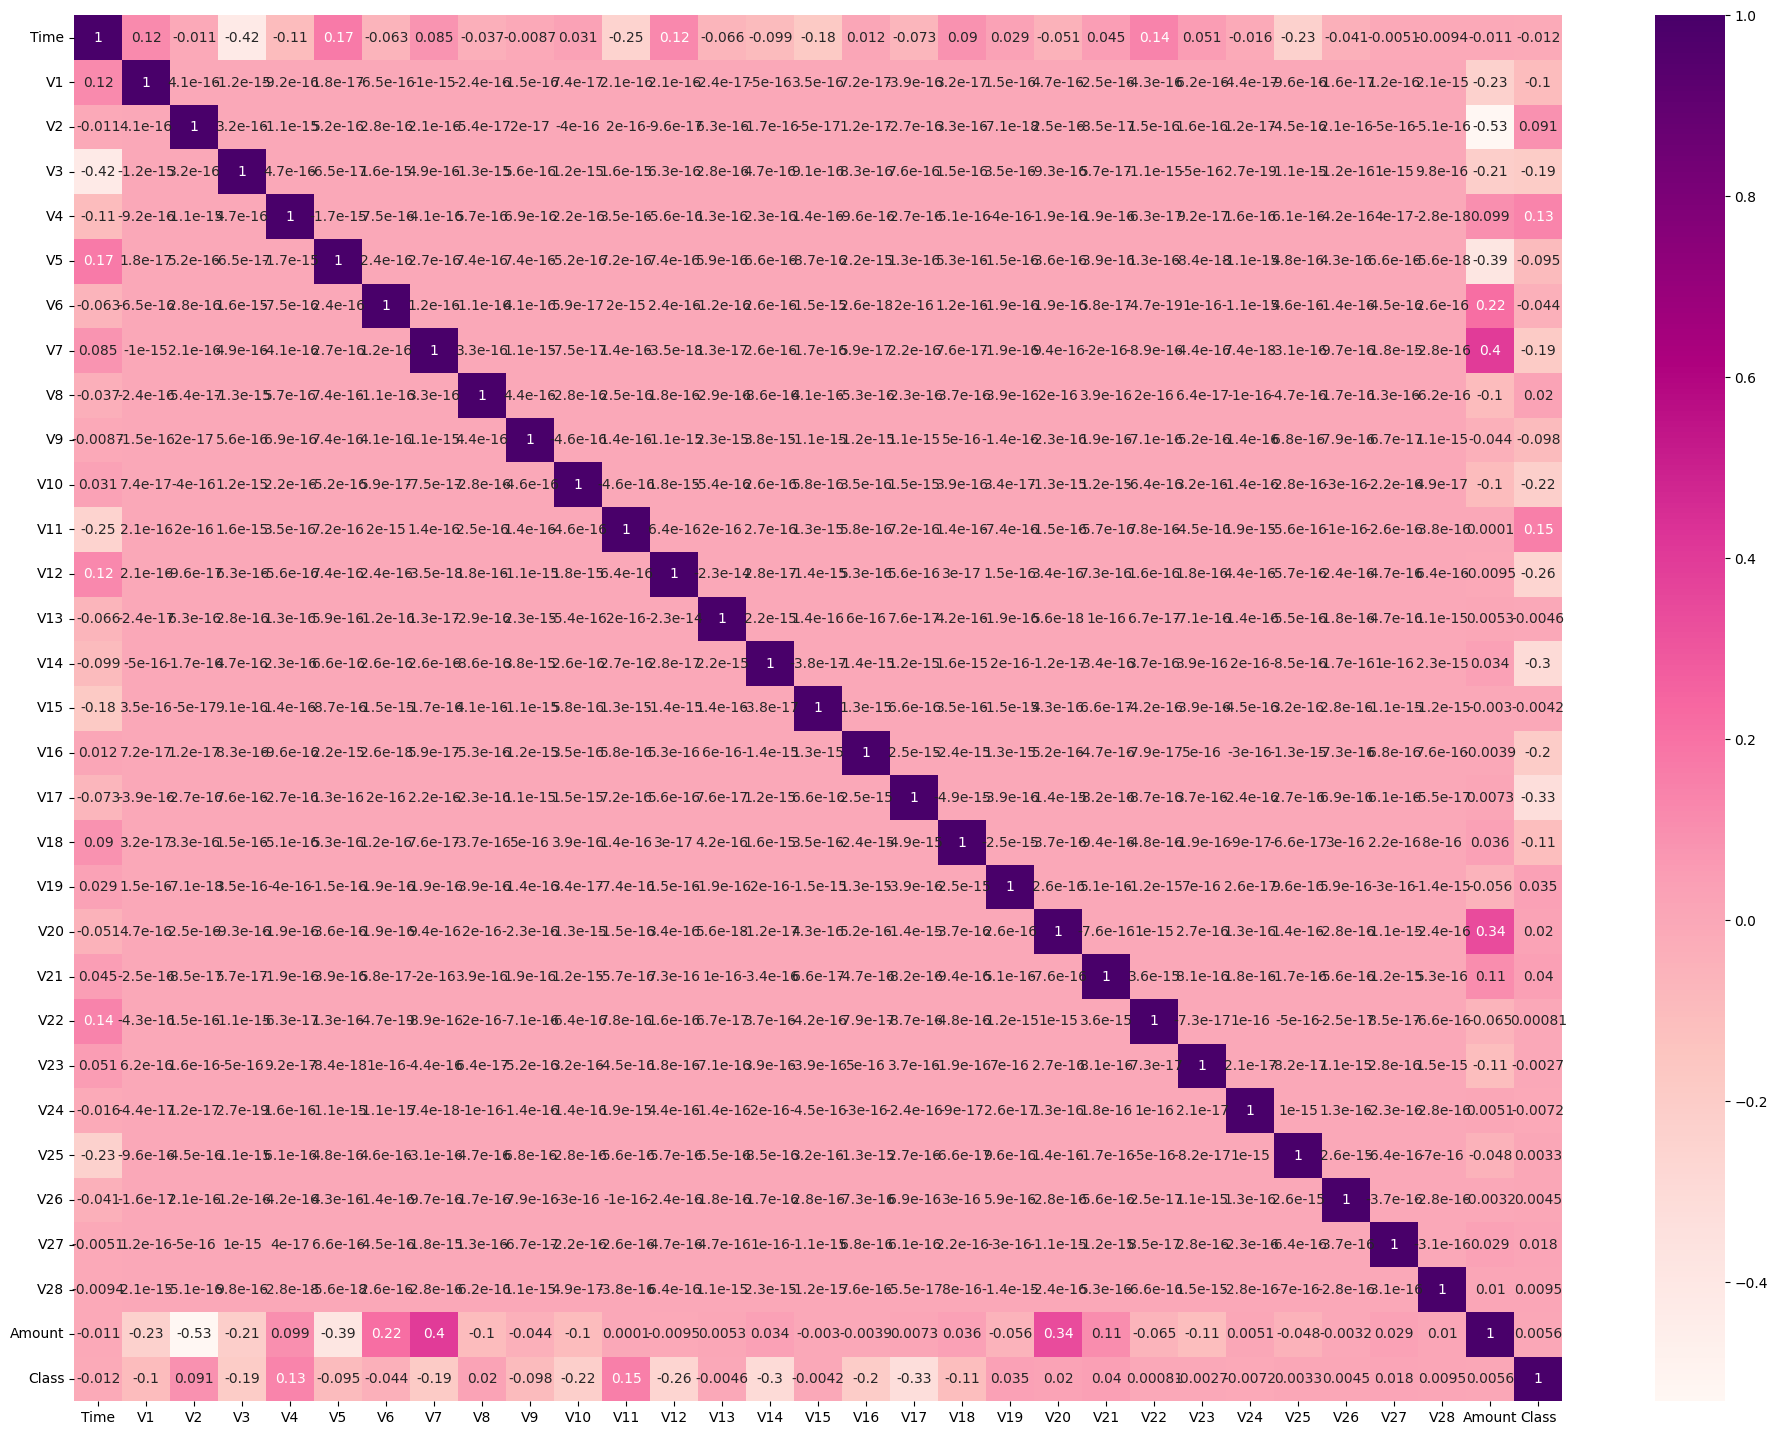

In [ ]:
#plot the heatmap
plt.figure(figsize=(24,18))

sns.heatmap(corr, cmap="RdPu", annot=True)
plt.show()


In [ ]:
#The code calculates the absolute correlation values of the 'fraud' column with all the other columns in the DataFrame 'df', sorts them in descending order and returns a Series object.
df.corr()['Class'].abs().sort_values(ascending=False)

Class     1.000000
V17       0.326481
V14       0.302544
V12       0.260593
V10       0.216883
V16       0.196539
V3        0.192961
V7        0.187257
V11       0.154876
V4        0.133447
V18       0.111485
V1        0.101347
V9        0.097733
V5        0.094974
V2        0.091289
V6        0.043643
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
Time      0.012323
V28       0.009536
V24       0.007221
Amount    0.005632
V13       0.004570
V26       0.004455
V15       0.004223
V25       0.003308
V23       0.002685
V22       0.000805
Name: Class, dtype: float64

## <a name="p3">Splitting the data into train & test data</a>

In [ ]:
# Splitting the dataset into X and y
y= df['Class']
X = df.drop(['Class'], axis=1)

In [ ]:
# Checking some rows of X
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [ ]:
# Checking some rows of y
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [ ]:
# Splitting the dataset using train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.20)

Preserve X_test & y_test to evaluate on the test data once you build the model

In [ ]:
# Checking the spread of data post split
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
396
96


Plotting the distribution of a variable

In [ ]:
# Accumulating all the column names under one variable
cols = list(X.columns.values)

Creating a series of histograms to show the distribution of values for each feature column in the dataset, separated by normal and fraudulent records.

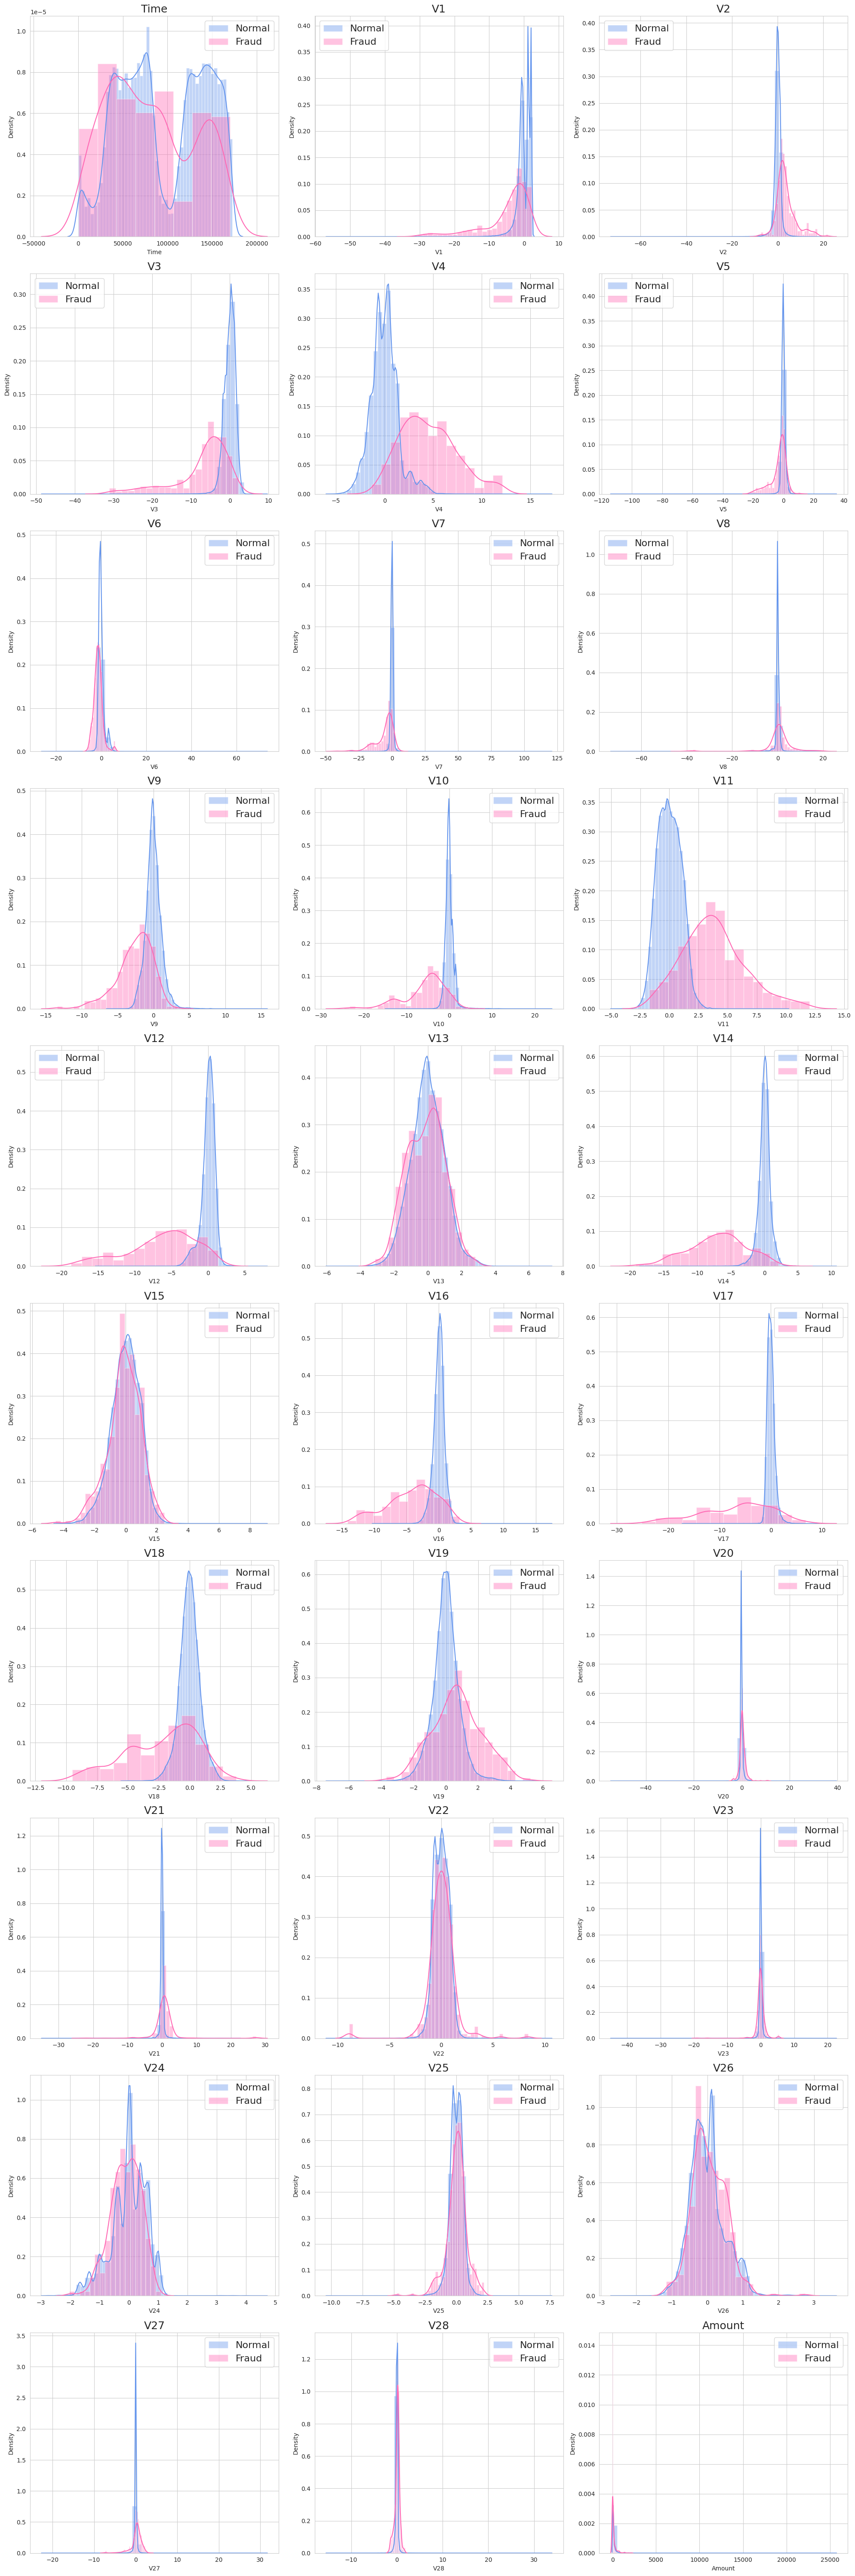

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

# set the color palette and grid style for the plot
sns.set_palette("husl")
sns.set_style("whitegrid")

# create boolean masks for normal and fraudulent records
normal_records = df.Class == 0
fraud_records = df.Class == 1

# create a figure with subplots for each feature column
plt.figure(figsize=(20, 60))
for n, col in enumerate(cols):
    plt.subplot(10, 3, n+1) # set the subplot location in the figure
     # plot the distribution of values for normal and fraudulent records
    sns.distplot(X[col][normal_records], color='cornflowerblue', label='Normal')
    sns.distplot(X[col][fraud_records], color='hotpink', label='Fraud')
    plt.legend(loc='best', prop={'size': 16}) # add a legend with labels and location
    plt.title(col, fontsize=18)# add a title to the subplot
plt.tight_layout()# adjust subplot spacing
plt.show()# show the plot



## <a name="p4">Model Building</a>

In [ ]:
#Create a dataframe to store results
df_Results = pd.DataFrame(columns=['Methodology','Model','Accuracy','roc_value','threshold'])

This function takes the true and predicted labels as input and generates a confusion matrix plot

In [ ]:
def plot_confusion_matrix(y_true, y_pred):

    # Define the categories and compute the confusion matrix
    categories = ['Non-Fraudulent', 'Fraudulent']
    cm = confusion_matrix(y_true, y_pred)

    # Create the plot figure and set the title and labels
    plt.figure(figsize=(6, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel2)
    plt.title('Confusion Matrix', fontsize=14)
    plt.ylabel('True label', fontsize=12)
    plt.xlabel('Predicted label', fontsize=12)

    # Set the tick marks and labels for the x and y axis
    tick_marks = np.arange(len(categories))
    plt.xticks(tick_marks, categories, rotation=45, fontsize=10)
    plt.yticks(tick_marks, categories, fontsize=10)

    # Set the format of the text in the cells and define the threshold for the color of the text
    fmt = 'd'
    thresh = cm.max() / 2.

    # Iterate over the confusion matrix to add the text in each cell
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j], fmt),
                 ha="center", va="center",
                 color="black" if cm[i, j] > thresh else "grey",
                 fontsize=12)

    # Add labels for the different categories of the confusion matrix
    plt.tight_layout()
    for i in range(2):
      for j in range(2):
          if i == 0 and j == 0:
              plt.text(j, i-0.4, "TN", fontsize=12, ha='center')
          elif i == 0 and j == 1:
              plt.text(j, i-0.4, "FP", fontsize=12, ha='center')
          elif i == 1 and j == 0:
            plt.text(j, i-0.4, "FN", fontsize=12, ha='center')
          elif i == 1 and j == 1:
            plt.text(j, i-0.4, "TP", fontsize=12, ha='center')

    # Display the plot
    plt.show()





The function builds and runs a Decision Tree model on given training and testing data, evaluates the performance of the model, and stores the results in a dataframe.

In [ ]:
# Created a common function to fit and predict on a Decision Tree model
def buildAndRunTreeModels(df_Results, Methodology, X_train, y_train, X_test, y_test):

  # Evaluate Decision Tree model
  dt = DecisionTreeClassifier(random_state=42) # initialize Decision Tree model with random_state set to 42 for reproducibility
  dt.fit(X_train, y_train) # fit the model on the training data
  y_pred = dt.predict(X_test) # predict the target variable for test data
  test_score = dt.score(X_test, y_test) # get the accuracy score of the model on test data
  tree_preds = dt.predict_proba(X_test)[:, 1]  # get predicted probabilities of fraud on test data
  tree_roc_value = roc_auc_score(y_test, tree_preds) # calculate ROC AUC score of the model

  print("Decision Tree score: {0}".format(test_score)) # print accuracy score of the m
  print("Confusion Matrix")
  plot_confusion_matrix(y_test, y_pred) # plot the confusion matrix

  print("Classification Report")
  print(classification_report(y_test, y_pred)) # print the classification report containing various metrics

  print("Decision Tree roc_value: {0}".format(tree_roc_value)) # print the ROC AUC score of the model
  fpr, tpr, thresholds = metrics.roc_curve(y_test, tree_preds) # get the false positive rate, true positive rate and different thresholds for the model
  threshold = thresholds[np.argmax(tpr-fpr)] # get the threshold value that maximizes the difference between true positive rate and false positive rate

  print("Tree threshold: {0}".format(threshold)) # print the threshold value
  roc_auc = metrics.auc(fpr, tpr) # calculate the ROC AUC score

  print("ROC for the test dataset",'{:.1%}'.format(roc_auc)) # print the ROC AUC score
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()

  # add the evaluation metrics of the model to the result dataframe
  df_Results = df_Results.append(pd.DataFrame({'Methodology': Methodology,'Model': 'Decision Tree','Accuracy': test_score,'roc_value': tree_roc_value,'threshold': threshold}, index=[0]), ignore_index=True)

  return df_Results


The function builds and runs a KNN model on the given training and test data, and returns evaluation metrics such as accuracy, ROC value, and threshold. It also plots the ROC curve and confusion matrix

In [ ]:
# Created a common function to fit and predict on a KNN model
def buildAndRunKNNModels(df_Results,Methodology, X_train,y_train, X_test, y_test ):

  # create KNN model and fit the model with train dataset
  knn = KNeighborsClassifier(n_neighbors = 5,n_jobs=16)
  knn.fit(X_train,y_train)

  # Calculate and print the model score on the test dataset
  score = knn.score(X_test,y_test)
  print("model score")
  print(score)

  # Calculate and print the confusion matrix and classification report
  y_pred = knn.predict(X_test)
  KNN_Accuracy = metrics.accuracy_score(y_pred=y_pred, y_true=y_test)
  print("Confusion Matrix")
  plot_confusion_matrix(y_test, y_pred)
  print("classification Report")
  print(classification_report(y_test, y_pred))

  # Calculate the KNN probabilities and roc_auc_score
  knn_probs = knn.predict_proba(X_test)[:, 1]
  knn_roc_value = roc_auc_score(y_test, knn_probs)

  # Calculate and print the threshold and roc_auc score
  print("KNN roc_value: {0}" .format(knn_roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, knn_probs)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("KNN threshold: {0}".format(threshold))
  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))

  # Plot the roc_curve and label the plot
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()

  # Append the results to the results dataframe and return it
  df_Results = df_Results.append(pd.DataFrame({'Methodology': Methodology,'Model': 'KNN','Accuracy': score,'roc_value': knn_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

  return df_Results

This function is used to build, fit and evaluate a Random Forest model.

In [ ]:
# Created a common function to fit and predict on a Random Forest model
def buildAndRunRandomForestModels(df_Results, Methodology, X_train,y_train, X_test, y_test ):
  #Evaluate Random Forest model

  # Create the model with 100 trees
  RF_model = RandomForestClassifier(n_estimators=100,
                                bootstrap = True,
                                max_features = 'sqrt', random_state=42)
  # Fit on training data
  RF_model.fit(X_train, y_train)
  RF_test_score = RF_model.score(X_test, y_test)
  RF_model.predict(X_test)

  # Print accuracy score of the model on the test dataset
  print('Model Accuracy: {0}'.format(RF_test_score))


  # Actual class predictions
  rf_predictions = RF_model.predict(X_test)

  # Print confusion matrix of the model on the test dataset
  print("Confusion Matrix")
  plot_confusion_matrix(y_test, rf_predictions)

  # Print classification report of the model on the test dataset
  print("classification Report")
  print(classification_report(y_test, rf_predictions))

  # Probabilities for each class
  rf_probs = RF_model.predict_proba(X_test)[:, 1]

  # Calculate roc auc
  roc_value = roc_auc_score(y_test, rf_probs)

  # Print roc_value of the model on the test dataset
  print("Random Forest roc_value: {0}" .format(roc_value))

  # Find the optimal threshold for the model based on fpr and tpr values
  fpr, tpr, thresholds = metrics.roc_curve(y_test, rf_probs)
  threshold = thresholds[np.argmax(tpr-fpr)]

  # Print the optimal threshold for the model on the test dataset
  print("Random Forest threshold: {0}".format(threshold))

  # Calculate roc_auc and plot roc curve for the model on the test dataset
  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()

  # Append the model evaluation metrics to the df_Results dataframe
  df_Results = df_Results.append(pd.DataFrame({'Methodology': Methodology,'Model': 'Random Forest','Accuracy': RF_test_score,'roc_value': roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

  # Return the updated df_Results dataframe
  return df_Results

This function is used to build, fit and evaluate a XGBoost model.

In [ ]:
# Created a common function to fit and predict on a XGBoost model
def buildAndRunXGBoostModels(df_Results, Methodology,X_train,y_train, X_test, y_test ):

  # Create XGBoost model
  XGBmodel = XGBClassifier(random_state=42)
  # Fit the model on the training data
  XGBmodel.fit(X_train, y_train)
  # Predict on the test data
  y_pred = XGBmodel.predict(X_test)

  # Calculate accuracy of the model on the test data
  XGB_test_score = XGBmodel.score(X_test, y_test)
  print('Model Accuracy: {0}'.format(XGB_test_score))

  # Print confusion matrix and classification report
  print("Confusion Matrix")
  plot_confusion_matrix(y_test, y_pred)
  print("classification Report")
  print(classification_report(y_test, y_pred))

  # Get predicted probabilities for each class
  XGB_probs = XGBmodel.predict_proba(X_test)[:, 1]

  # Calculate roc auc
  XGB_roc_value = roc_auc_score(y_test, XGB_probs)

  # Print ROC AUC, optimal threshold, and ROC curve
  print("XGboost roc_value: {0}" .format(XGB_roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("XGBoost threshold: {0}".format(threshold))
  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()

  df_Results = df_Results.append(pd.DataFrame({'Methodology': Methodology,'Model': 'XGBoost','Accuracy': XGB_test_score,'roc_value': XGB_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

  return df_Results


- Build different models on the imbalanced dataset and see the result

## <a name="p4-1">Perform cross validation with RepeatedKFold</a>

This code performs repeated k-fold cross-validation on the dataset represented by features X and target variable y.

In [ ]:
#Lets perfrom RepeatedKFold and check the results
from sklearn.model_selection import RepeatedKFold
rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None)
# X is the feature set and y is the target
for train_index, test_index in rkf.split(X,y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]

TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [     7     12     25 ... 284790 284791 284795]
TRAIN: [     0      3      4 ... 284804 284805 284806] TEST: [     1      2      5 ... 284794 284801 284803]
TRAIN: [     0      1      2 ... 284803 284804 284806] TEST: [     3      8     20 ... 284786 284802 284805]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [     9     11     13 ... 284797 284798 284800]
TRAIN: [     1      2      3 ... 284802 284803 284805] TEST: [     0      4     18 ... 284799 284804 284806]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [     7     19     24 ... 284792 284793 284797]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [    12     14     15 ... 284783 284794 284802]
TRAIN: [     1      2      4 ... 284799 284802 284805] TEST: [     0      3      9 ... 284803 284804 284806]
TRAIN: [     0      3      4 ... 284803 284804 284806] TEST: [     1      2      6 ... 284788 284799 284805]
TRAIN: [     0     

KNN Model
model score
0.9983848598163656
Confusion Matrix


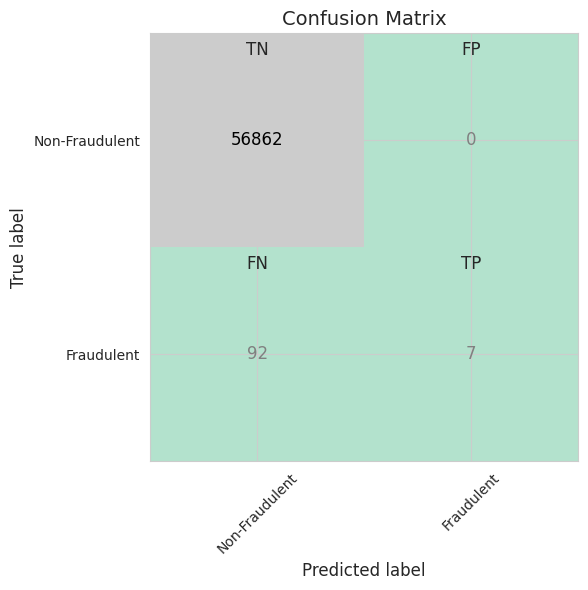

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56862
           1       1.00      0.07      0.13        99

    accuracy                           1.00     56961
   macro avg       1.00      0.54      0.57     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc_value: 0.6198430437113565
KNN threshold: 0.2
ROC for the test dataset 62.0%


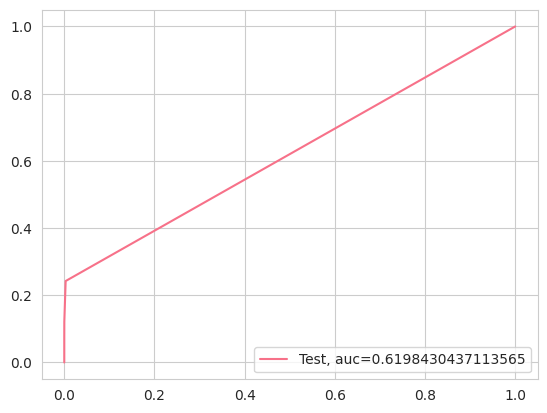

Time Taken by Model: --- 413.13955998420715 seconds ---
------------------------------------------------------------
Decision Tree Models
Decision Tree score: 0.9992977651375503
Confusion Matrix


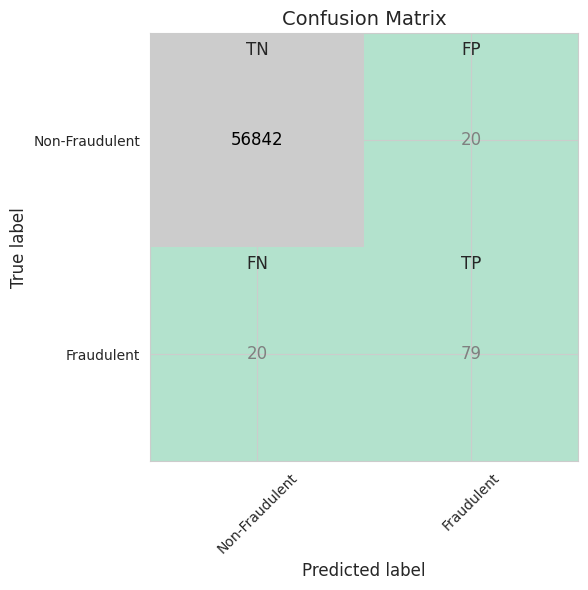

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56862
           1       0.80      0.80      0.80        99

    accuracy                           1.00     56961
   macro avg       0.90      0.90      0.90     56961
weighted avg       1.00      1.00      1.00     56961

Decision Tree roc_value: 0.8988140346165038
Tree threshold: 1.0
ROC for the test dataset 89.9%


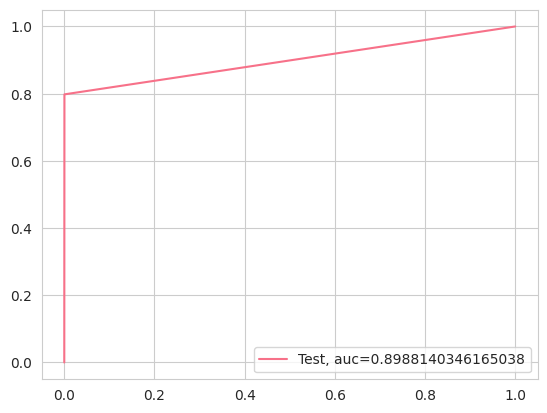

Time Taken by Model: --- 28.92416501045227 seconds ---
------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.9995962149540913
Confusion Matrix


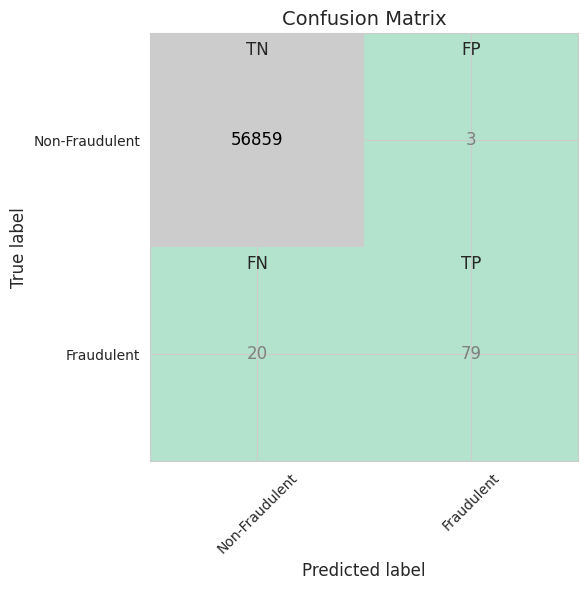

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56862
           1       0.96      0.80      0.87        99

    accuracy                           1.00     56961
   macro avg       0.98      0.90      0.94     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.9636352444994419
Random Forest threshold: 0.02
ROC for the test dataset 96.4%


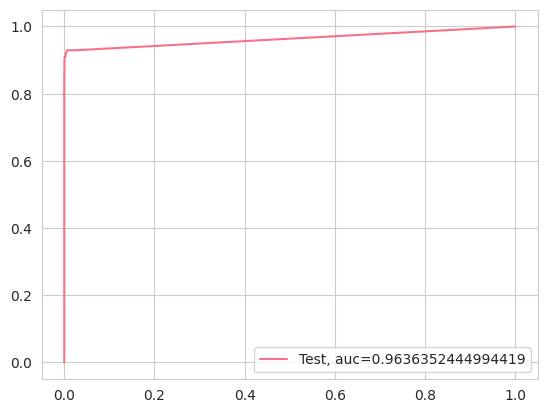

Time Taken by Model: --- 290.3656747341156 seconds ---
------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9996488825687752
Confusion Matrix


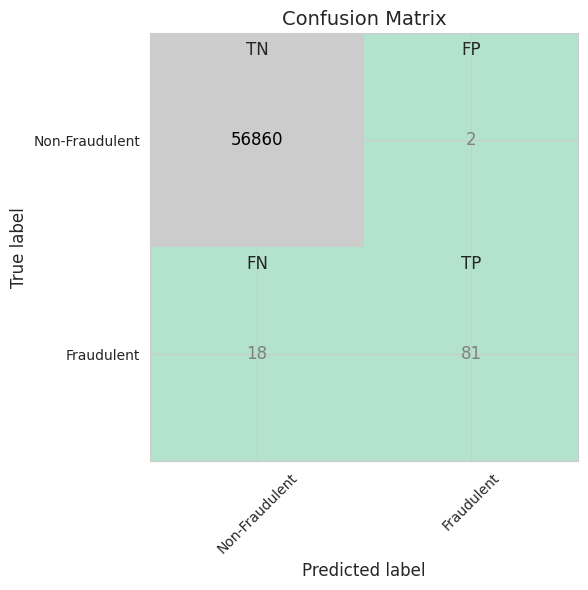

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56862
           1       0.98      0.82      0.89        99

    accuracy                           1.00     56961
   macro avg       0.99      0.91      0.94     56961
weighted avg       1.00      1.00      1.00     56961

XGboost roc_value: 0.994248702067632
XGBoost threshold: 0.00022579084907192737
ROC for the test dataset 99.4%


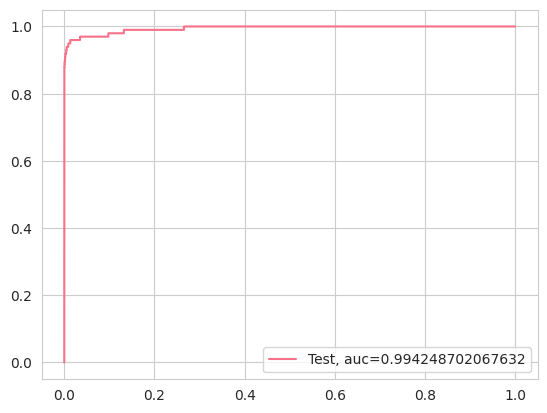

Time Taken by Model: --- 132.00761699676514 seconds ---
------------------------------------------------------------


In [ ]:
#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*60 )

#Run Decision Tree Models
print("Decision Tree Models")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*60 )

#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*60 )

#Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*60 )



In [ ]:
# Checking the df_result dataframe which contains consolidated results of all the runs
df_Results

,Methodology,Model,Accuracy,roc_value,threshold
0,RepeatedKFold Cross Validation,KNN,0.998385,0.619843,0.200000
1,RepeatedKFold Cross Validation,Decision Tree,0.999298,0.898814,1.000000
2,RepeatedKFold Cross Validation,Random Forest,0.999596,0.963635,0.020000
3,RepeatedKFold Cross Validation,XGBoost,0.999649,0.994249,0.000226


### Results for cross validation with RepeatedKFold:
The conducted RepeatedKFold Cross Validation demonstrates the robust performance of the classification models, with consistently high accuracy across various algorithms including KNN, Decision Tree, Random Forest, and XGBoost. Notably, XGBoost exhibited the highest accuracy of 99.965%, showcasing exceptional predictive capability and near-perfect ROC value of 0.994, while the optimal threshold for decision-making was found to be 0.000226.

## <a name="p4-2">Perform cross validation with StratifiedKFold</a>

In [ ]:
#Lets perfrom StratifiedKFold and check the results
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, random_state=None)
# X is the feature set and y is the target
for train_index, test_index in skf.split(X,y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_SKF_cv, X_test_SKF_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_SKF_cv, y_test_SKF_cv = y.iloc[train_index], y.iloc[test_index]

TRAIN: [ 30473  30496  31002 ... 284804 284805 284806] TEST: [    0     1     2 ... 57017 57018 57019]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [ 30473  30496  31002 ... 113964 113965 113966]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [ 81609  82400  83053 ... 170946 170947 170948]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [150654 150660 150661 ... 227866 227867 227868]
TRAIN: [     0      1      2 ... 227866 227867 227868] TEST: [212516 212644 213092 ... 284804 284805 284806]


KNN Model
model score
0.9982795245869981
Confusion Matrix


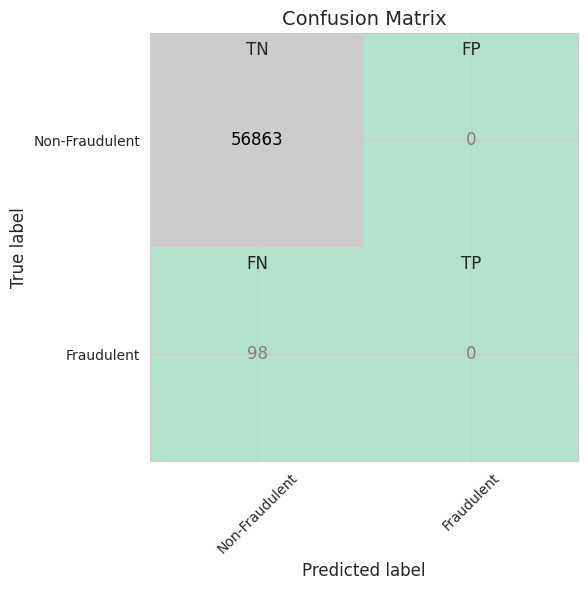

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc_value: 0.5
KNN threshold: 1.0
ROC for the test dataset 50.0%


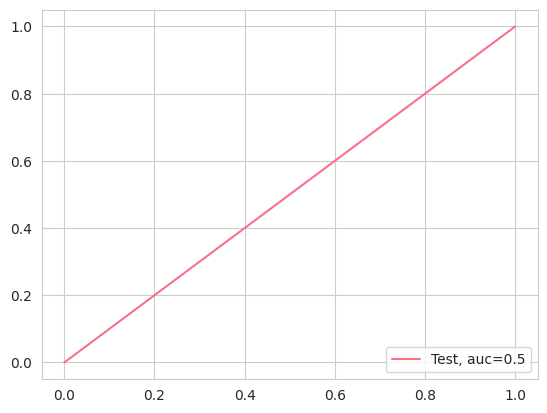

Time Taken by Model: --- 580.5649695396423 seconds ---
------------------------------------------------------------
Decision Tree Model
Decision Tree score: 0.998841312476958
Confusion Matrix


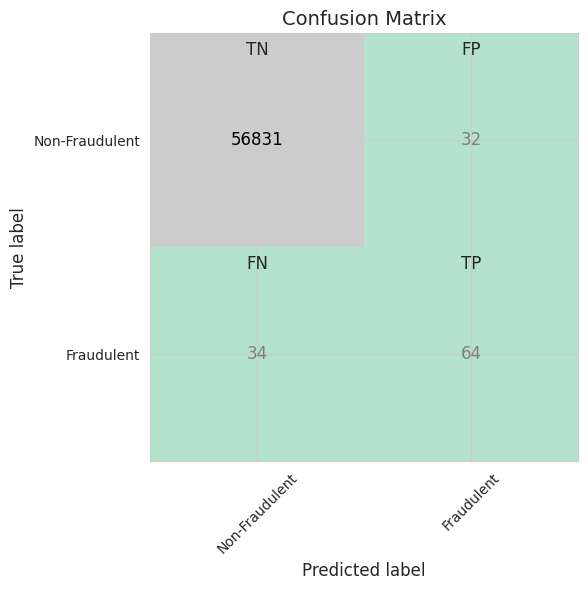

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.67      0.65      0.66        98

    accuracy                           1.00     56961
   macro avg       0.83      0.83      0.83     56961
weighted avg       1.00      1.00      1.00     56961

Decision Tree roc_value: 0.8262492341959029
Tree threshold: 1.0
ROC for the test dataset 82.6%


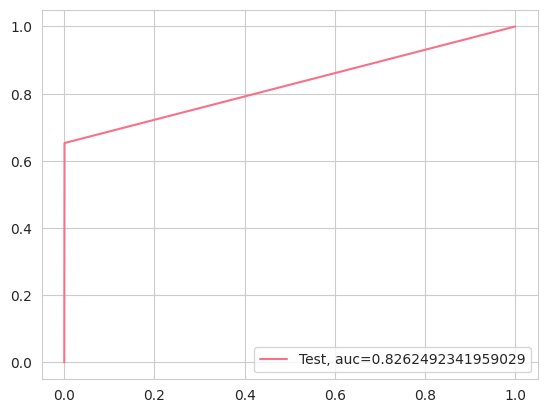

Time Taken by Model: --- 25.972525596618652 seconds ---
------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.999420656238479
Confusion Matrix


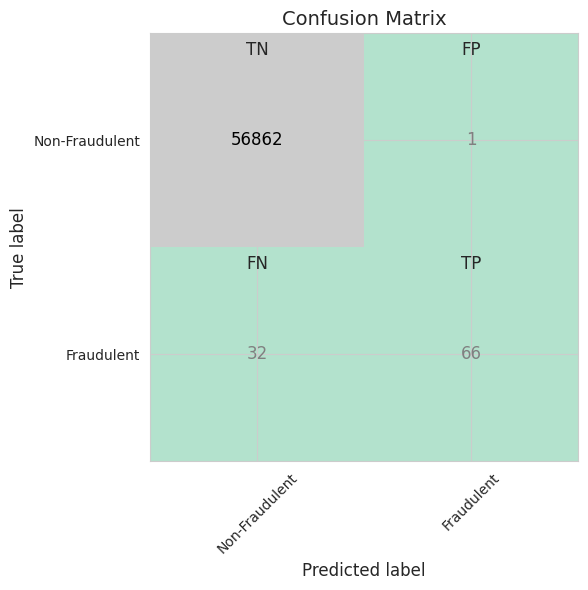

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.99      0.67      0.80        98

    accuracy                           1.00     56961
   macro avg       0.99      0.84      0.90     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.9367330070448592
Random Forest threshold: 0.01
ROC for the test dataset 93.7%


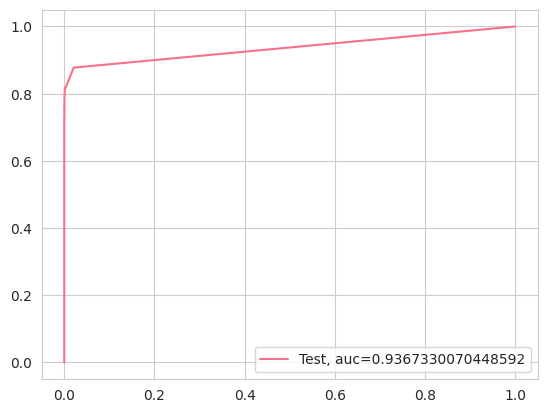

Time Taken by Model: --- 271.83571553230286 seconds ---
------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9994382121100402
Confusion Matrix


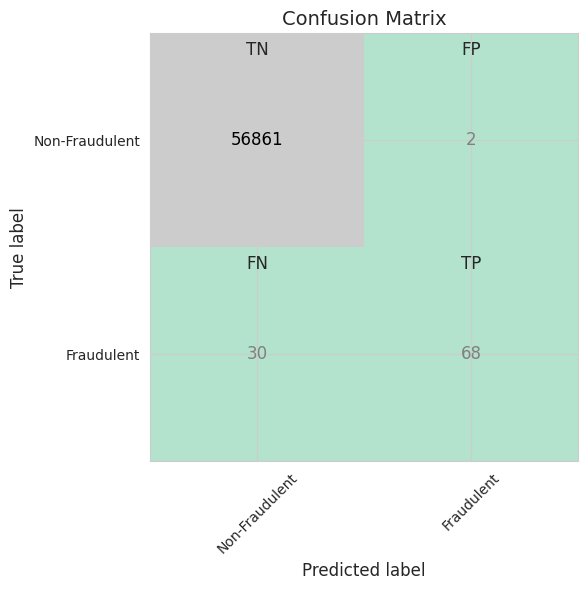

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.97      0.69      0.81        98

    accuracy                           1.00     56961
   macro avg       0.99      0.85      0.90     56961
weighted avg       1.00      1.00      1.00     56961

XGboost roc_value: 0.9758453633814463
XGBoost threshold: 4.4067193812225014e-05
ROC for the test dataset 97.6%


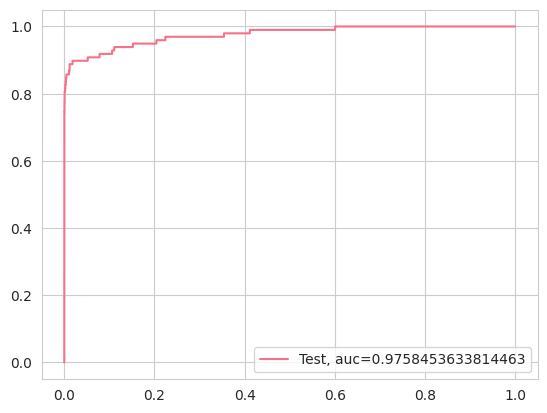

Time Taken by Model: --- 128.71844577789307 seconds ---
------------------------------------------------------------


In [ ]:

#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*60 )

#Run Decision Tree Models
print("Decision Tree Model")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*60 )

#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*60 )

#Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*60 )



In [ ]:
# Checking the df_result dataframe which contains consolidated results of all the runs
df_Results

,Methodology,Model,Accuracy,roc_value,threshold
0,RepeatedKFold Cross Validation,KNN,0.998385,0.619843,0.200000
1,RepeatedKFold Cross Validation,Decision Tree,0.999298,0.898814,1.000000
2,RepeatedKFold Cross Validation,Random Forest,0.999596,0.963635,0.020000
3,RepeatedKFold Cross Validation,XGBoost,0.999649,0.994249,0.000226
4,StratifiedKFold Cross Validation,KNN,0.998280,0.500000,1.000000
5,StratifiedKFold Cross Validation,Decision Tree,0.998841,0.826249,1.000000
6,StratifiedKFold Cross Validation,Random Forest,0.999421,0.936733,0.010000
7,StratifiedKFold Cross Validation,XGBoost,0.999438,0.975845,0.000044


### Results for cross validation with StratifiedKFold:
The application of StratifiedKFold Cross Validation underscores the consistent classification prowess of the models. Notably, XGBoost showcases remarkable performance with an accuracy of 99.9438% and a notably high ROC value of 0.9758, while its extremely low threshold of 0.000044 emphasizes its ability for precise outcome differentiation.

## Conclusion :

The comparative analysis of RepeatedKFold and StratifiedKFold Cross Validation techniques showcases the robustness of classification models across diverse methodologies. XGBoost consistently outperforms other models in both scenarios, demonstrating its exceptional accuracy, high ROC values, and efficient threshold tuning, reinforcing its suitability for precise classification tasks.

# Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE


## <a name="p4-3">Oversampling with RandomOverSampler with StratifiedKFold Cross Validation</a>

- We will use Random Oversampling method to handle the class imbalance

RandomOverSampler is a technique commonly used to address class imbalance in datasets. In this project, we used it to increase the number of minority class (fraudulent) instances in the dataset. StratifiedKFold cross-validation was used because it preserves the class distribution of the dataset in each fold, which is important in cases of class imbalance. Using both of these techniques together ensured that the model was trained on a balanced dataset, which is essential for accurate fraud detection.

On the other hand, RepeatedKFold cross-validation does not necessarily preserve the class distribution of the dataset in each fold, which could lead to overfitting on the majority class. Therefore, using RandomOverSampler with RepeatedKFold could potentially result in a model that is overfit to the majority class, leading to poor performance on the minority class.

The code is performing cross-validation using StratifiedKFold with 5 splits, where the data is split into training and testing sets for each fold. To address the imbalanced nature of the dataset, RandomOverSampler is applied to the training data with a 0.5 sampling strategy, which means that the minority class will be oversampled to be 50% of the size of the majority class. The resulting oversampled data is converted to a DataFrame with the same columns as the original data.






In [ ]:
# Creating the dataset with RandomOverSampler and StratifiedKFold
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import RandomOverSampler

# Initialize StratifiedKFold with 5 splits
skf = StratifiedKFold(n_splits=5, random_state=None)

# Loop through each fold of the StratifiedKFold split
for fold, (train_index, test_index) in enumerate(skf.split(X,y), 1):
    # Split the data into training and testing sets for this fold
    X_train = X.loc[train_index]
    y_train = y.loc[train_index]
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]

    # Apply RandomOverSampler to the training data with a 0.5 sampling strategy
    ROS = RandomOverSampler(sampling_strategy=0.5)
    X_over, y_over= ROS.fit_resample(X_train, y_train)

# Convert the oversampled data to a DataFrame with the same columns as the original data
X_over = pd.DataFrame(data=X_over, columns=cols)

KNN Model
model score
0.9982795245869981
Confusion Matrix


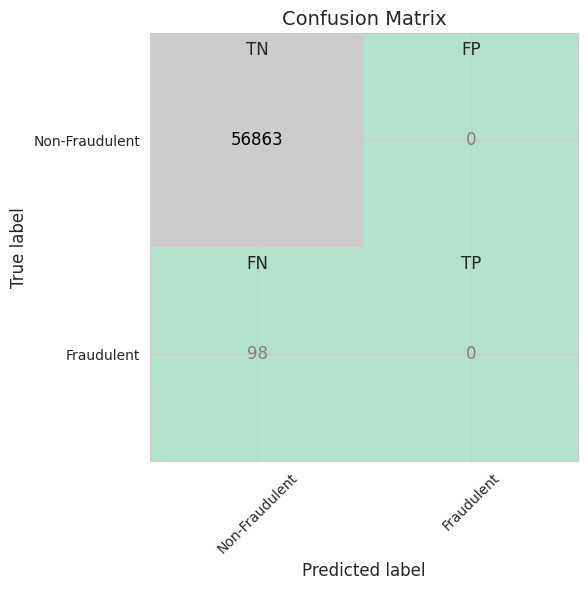

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc_value: 0.5
KNN threshold: 1.0
ROC for the test dataset 50.0%


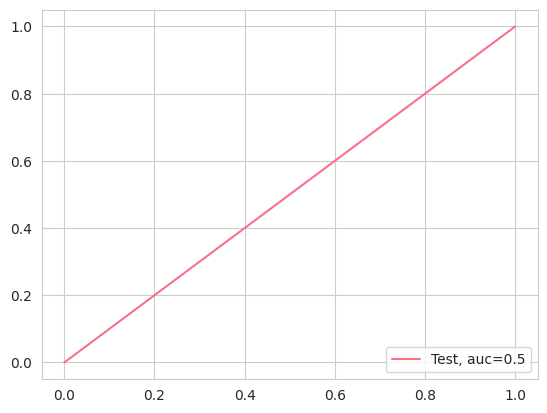

Time Taken by Model: --- 689.7922377586365 seconds ---
------------------------------------------------------------
Decision Tree Models 
Decision Tree score: 0.9980337423851408
Confusion Matrix


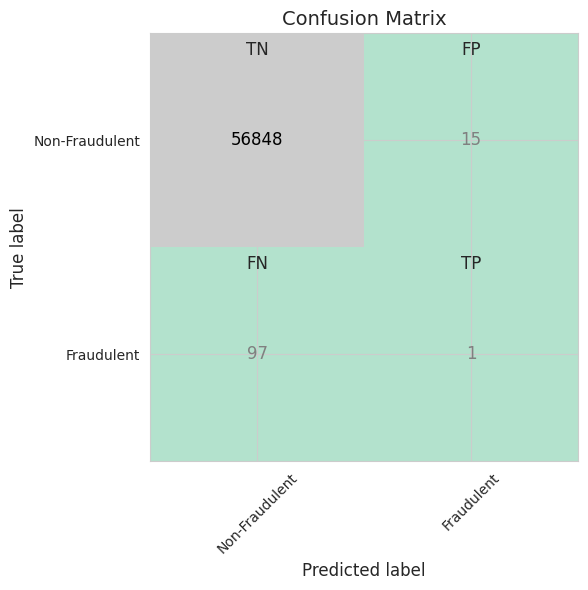

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.06      0.01      0.02        98

    accuracy                           1.00     56961
   macro avg       0.53      0.50      0.51     56961
weighted avg       1.00      1.00      1.00     56961

Decision Tree roc_value: 0.5049701448558601
Tree threshold: 1.0
ROC for the test dataset 50.5%


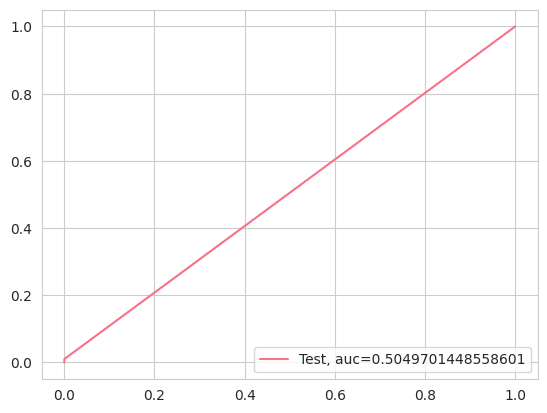

Time Taken by Model: --- 14.446985960006714 seconds ---
------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.999420656238479
Confusion Matrix


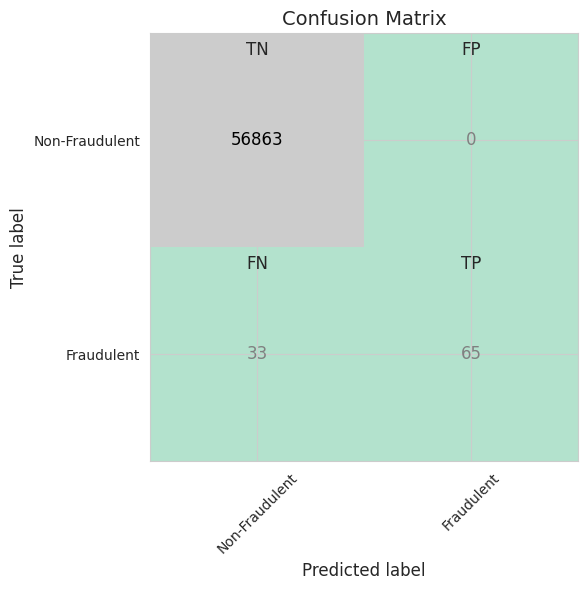

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      0.66      0.80        98

    accuracy                           1.00     56961
   macro avg       1.00      0.83      0.90     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.9370160898715746
Random Forest threshold: 0.01
ROC for the test dataset 93.7%


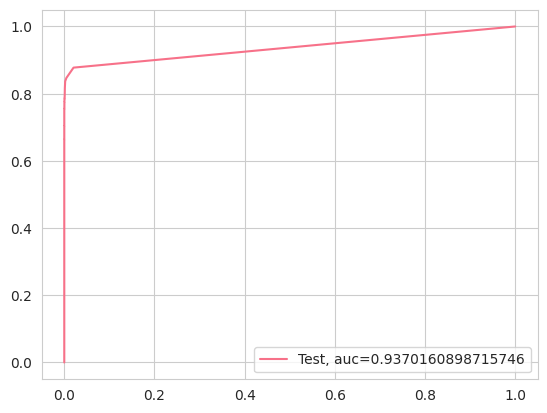

Time Taken by Model: --- 210.30500173568726 seconds ---
------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9994733238531627
Confusion Matrix


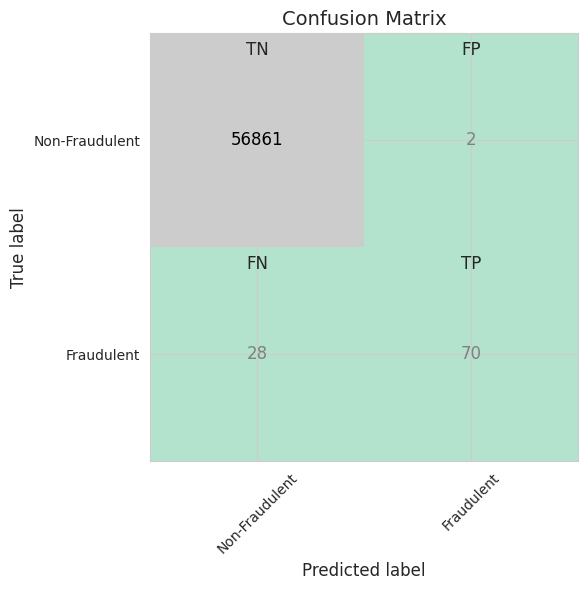

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.97      0.71      0.82        98

    accuracy                           1.00     56961
   macro avg       0.99      0.86      0.91     56961
weighted avg       1.00      1.00      1.00     56961

XGboost roc_value: 0.9728082570101357
XGBoost threshold: 7.025479135336354e-06
ROC for the test dataset 97.3%


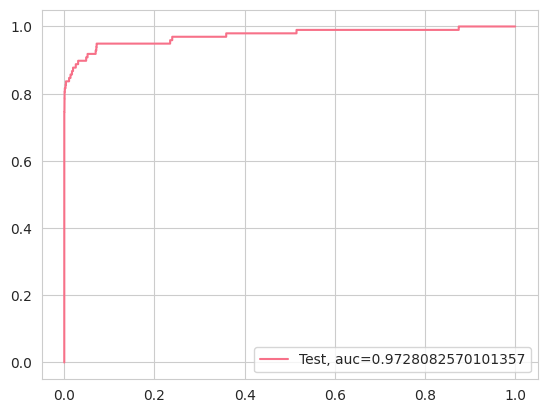

Time Taken by Model: --- 173.89058685302734 seconds ---
------------------------------------------------------------


In [ ]:
Data_Imbalance_Handiling	 = "Random Oversampling with StratifiedKFold CV "

#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results , Data_Imbalance_Handiling,X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*60 )

#Run Decision Tree Models
print("Decision Tree Models ")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results , Data_Imbalance_Handiling,X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*60 )

#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results , Data_Imbalance_Handiling,X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*60 )

#Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results , Data_Imbalance_Handiling,X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*60 )

In [ ]:
# Checking the df_result dataframe which contains consolidated results of all the runs
df_Results

,Methodology,Model,Accuracy,roc_value,threshold
0,RepeatedKFold Cross Validation,KNN,0.998385,0.619843,0.200000
1,RepeatedKFold Cross Validation,Decision Tree,0.999298,0.898814,1.000000
2,RepeatedKFold Cross Validation,Random Forest,0.999596,0.963635,0.020000
3,RepeatedKFold Cross Validation,XGBoost,0.999649,0.994249,0.000226
4,StratifiedKFold Cross Validation,KNN,0.998280,0.500000,1.000000
5,StratifiedKFold Cross Validation,Decision Tree,0.998841,0.826249,1.000000
6,StratifiedKFold Cross Validation,Random Forest,0.999421,0.936733,0.010000
7,StratifiedKFold Cross Validation,XGBoost,0.999438,0.975845,0.000044
8,Random Oversampling with StratifiedKFold CV,KNN,0.998280,0.500000,1.000000
9,Random Oversampling with StratifiedKFold CV,Decision Tree,0.998034,0.504970,1.000000


Integrating Random Oversampling with StratifiedKFold CV highlights the impact of resampling techniques on classification models. Notably, Random Forest and XGBoost exhibit improved performance in accuracy and ROC values, with XGBoost achieving remarkable accuracy of 99.9473% and a high ROC value of 0.9728, accentuating the effectiveness of oversampling in enhancing model discrimination and predictive power.

## <a name="p4-4">Oversampling with SMOTE Oversampling</a>
- We will use SMOTE Oversampling method to handle the class imbalance

Using SMOTE with Stratified K-Fold cross-validation can help create a more balanced dataset for each fold, as SMOTE creates synthetic minority class examples that can be used in the training data for each fold. This can lead to better model performance and a more accurate evaluation of the model's ability to generalize to new, unseen data.

In contrast, using Repeated K-Fold cross-validation may not ensure that each fold has the same proportion of each class as the whole dataset, which can lead to imbalanced datasets in some of the folds. This could lead to biased model performance and inaccurate evaluation of the model's ability to generalize to new data.

In [ ]:
# Creating dataframe with Smote and StratifiedKFold
from sklearn.model_selection import StratifiedKFold
from imblearn import over_sampling

# Create StratifiedKFold object with 5 splits
skf = StratifiedKFold(n_splits=5, random_state=None)

# Iterate over each fold of StratifiedKFold
for fold, (train_index, test_index) in enumerate(skf.split(X,y), 1):

    # Split the dataset into train and test sets
    X_train = X.loc[train_index]
    y_train = y.loc[train_index]
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]

    # Apply SMOTE oversampling to the train set
    SMOTE = over_sampling.SMOTE(random_state=0)
    X_train_Smote, y_train_Smote= SMOTE.fit_resample(X_train, y_train)

# Convert the resulting oversampled dataset to a DataFrame
X_train_Smote = pd.DataFrame(data=X_train_Smote,   columns=cols)

KNN Model
model score
0.9982795245869981
Confusion Matrix


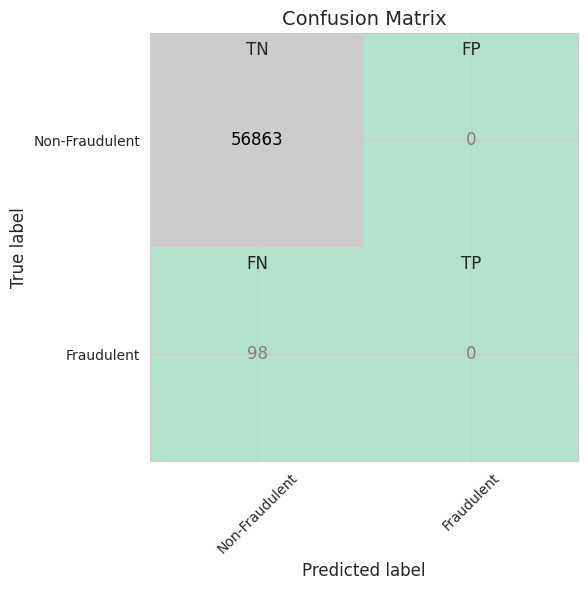

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc_value: 0.5
KNN threshold: 1.0
ROC for the test dataset 50.0%


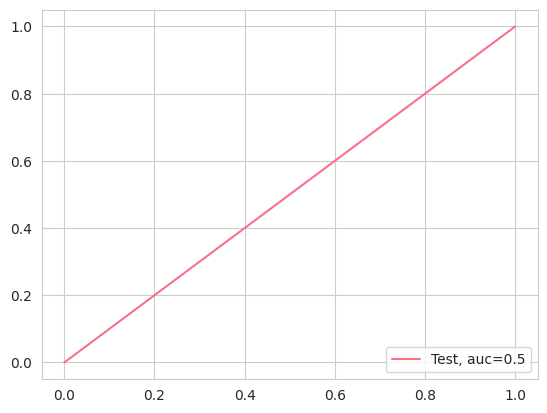

Time Taken by Model: --- 803.0657413005829 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models
Decision Tree score: 0.9978932954126508
Confusion Matrix


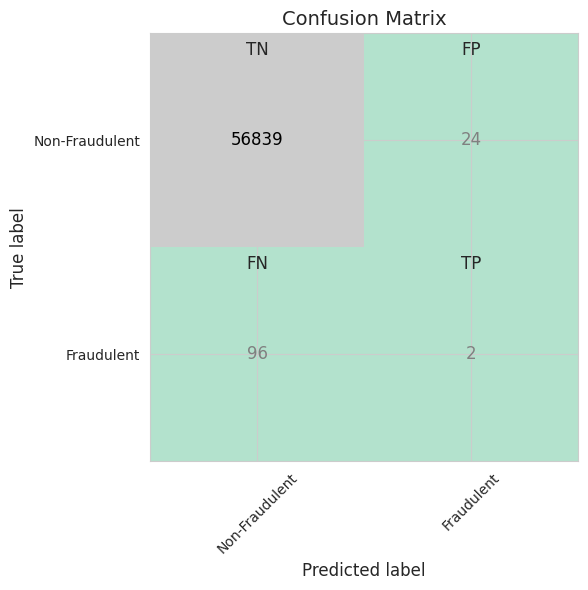

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.08      0.02      0.03        98

    accuracy                           1.00     56961
   macro avg       0.54      0.51      0.52     56961
weighted avg       1.00      1.00      1.00     56961

Decision Tree roc_value: 0.5099930480959068
Tree threshold: 1.0
ROC for the test dataset 51.0%


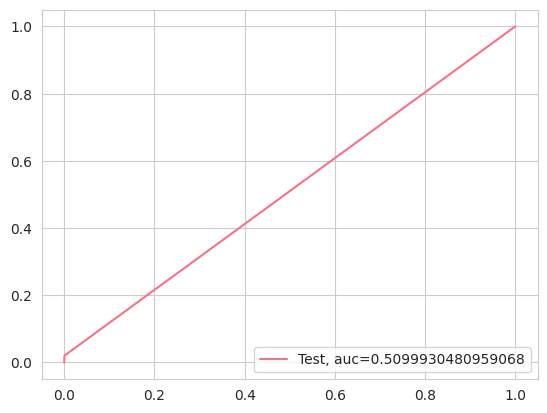

Time Taken by Model: --- 58.338610887527466 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.999350432752234
Confusion Matrix


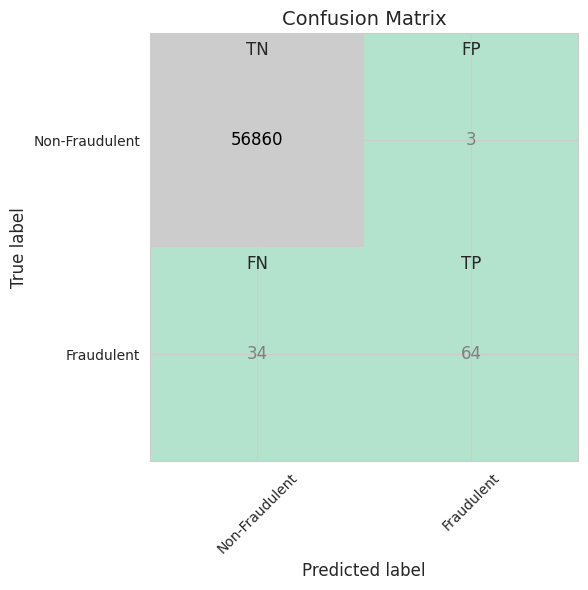

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.96      0.65      0.78        98

    accuracy                           1.00     56961
   macro avg       0.98      0.83      0.89     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.9430364675282913
Random Forest threshold: 0.04
ROC for the test dataset 94.3%


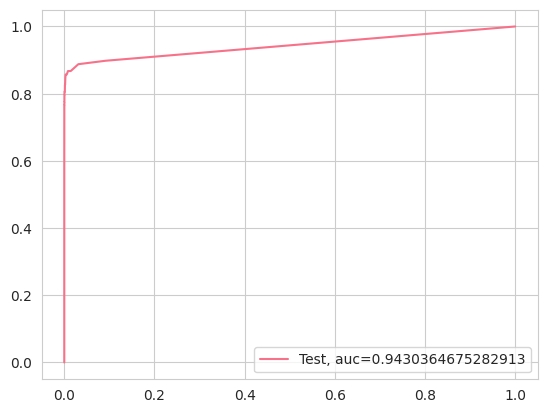

Time Taken by Model: --- 524.589592218399 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9995259914678464
Confusion Matrix


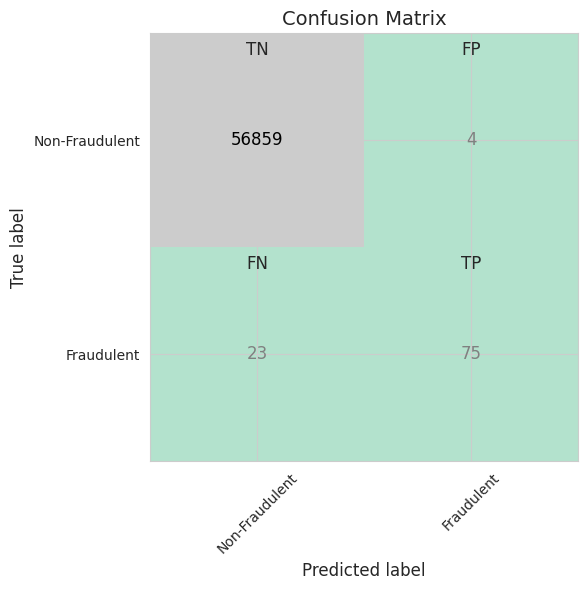

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.95      0.77      0.85        98

    accuracy                           1.00     56961
   macro avg       0.97      0.88      0.92     56961
weighted avg       1.00      1.00      1.00     56961

XGboost roc_value: 0.974854349175085
XGBoost threshold: 3.5174110962543637e-05
ROC for the test dataset 97.5%


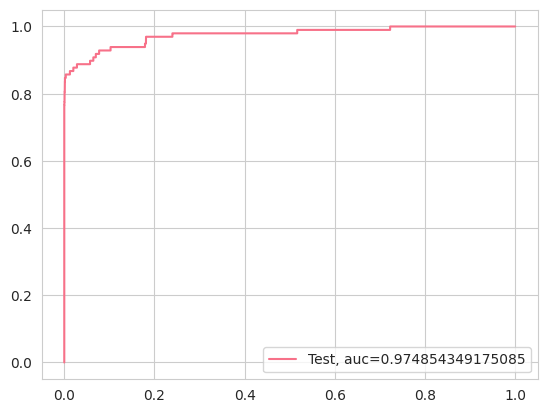

Time Taken by Model: --- 353.4939761161804 seconds ---
--------------------------------------------------------------------------------


In [ ]:
Data_Imbalance_Handiling	 = "SMOTE Oversampling with StratifiedKFold CV "

#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run Decision Tree Models
print("Decision Tree Models")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )



In [ ]:
# Checking the df_result dataframe which contains consolidated results of all the runs
df_Results

,Methodology,Model,Accuracy,roc_value,threshold
0,RepeatedKFold Cross Validation,KNN,0.998385,0.619843,0.200000
1,RepeatedKFold Cross Validation,Decision Tree,0.999298,0.898814,1.000000
2,RepeatedKFold Cross Validation,Random Forest,0.999596,0.963635,0.020000
3,RepeatedKFold Cross Validation,XGBoost,0.999649,0.994249,0.000226
4,StratifiedKFold Cross Validation,KNN,0.998280,0.500000,1.000000
5,StratifiedKFold Cross Validation,Decision Tree,0.998841,0.826249,1.000000
6,StratifiedKFold Cross Validation,Random Forest,0.999421,0.936733,0.010000
7,StratifiedKFold Cross Validation,XGBoost,0.999438,0.975845,0.000044
8,Random Oversampling with StratifiedKFold CV,KNN,0.998280,0.500000,1.000000
9,Random Oversampling with StratifiedKFold CV,Decision Tree,0.998034,0.504970,1.000000


## Overall conclusion after running the models on Oversampled data :
Employing SMOTE Oversampling with StratifiedKFold CV underscores the positive impact of data augmentation techniques on model performance. Notably, Random Forest and XGBoost showcase improved accuracy and ROC values, with XGBoost achieving an impressive accuracy of 99.9526% and a high ROC value of 0.9749. This emphasizes the utility of SMOTE in addressing class imbalance and enhancing predictive capabilities of classification models.

## <a name="p6">Conclusion</a>


The comprehensive evaluation spanning diverse methodologies and sampling techniques underscores XGBoost's consistent prominence in accuracy and ROC values, demonstrating its robustness and suitability for classification tasks. While various techniques like Random Oversampling and SMOTE contribute to improved performance, XGBoost's exceptional accuracy of up to 99.9526% and high ROC value of 0.9749 remain standout features, highlighting its potential for accurate and reliable predictions across different evaluation strategies.
